In [58]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

Linealización

In [59]:
def minimos_cuadrados_incertidumbre(x,y,t,i,name="Regresion",plot = True,Descargar= False):
    w = 1/(i**2)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_y = np.sum(w*y)
    sum_w_x = np.sum(w*x)
    sum_w_x_y = np.sum(w*x*y)
    sum_w = np.sum(w)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    pendiente = ((sum_w*sum_w_x_y)-(sum_w_x*sum_w_y))/delta_prima
    intercepto = ((sum_w_x_2*sum_w_y)-(sum_w_x*sum_w_x_y))/delta_prima
    error_inter = np.sqrt(sum_w_x_2/delta_prima)
    error_m = np.sqrt(sum_w/delta_prima)
    residuales = y-(pendiente*x+intercepto)
    normalize_residuales = (y-(pendiente*x+intercepto))/error_m
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})
        axs[0].errorbar(x, y,xerr=t, yerr=i, fmt=' ', label = "Datos", capsize=2, elinewidth=1,markeredgewidth=1, capthick=0.5)       
        axs[0].plot(x,pendiente*x+intercepto, label = "Regresión lineal", linestyle='--', color= "Black")
        axs[1].scatter(x,residuales)
        axs[2].scatter(x,normalize_residuales)
        axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[0].set_ylabel("Campo magnético [mT]\n")
        axs[1].set_ylabel('Residuales [mT]\n')
        axs[2].set_ylabel('Residuales\n Normalizados [mT]')
        plt.xlabel('Corriente [A]')
        axs[0].legend()
        plt.tight_layout()
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    print(pendiente, intercepto)
    return pendiente,intercepto, error_inter, error_m



def minimos_cuadrados_incertidumbre_2(x,y,t,i,name="Regresion",plot = False,Descargar= False):
    w = 1/(i**2)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_y = np.sum(w*y)
    sum_w_x = np.sum(w*x)
    sum_w_x_y = np.sum(w*x*y)
    sum_w = np.sum(w)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    pendiente = ((sum_w*sum_w_x_y)-(sum_w_x*sum_w_y))/delta_prima
    intercepto = ((sum_w_x_2*sum_w_y)-(sum_w_x*sum_w_x_y))/delta_prima
    error_inter = np.sqrt(sum_w_x_2/delta_prima)
    error_m = np.sqrt(sum_w/delta_prima)
    residuales = y-(pendiente*x+intercepto)
    normalize_residuales = (y-(pendiente*x+intercepto))/error_m
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})
        axs[0].errorbar(x, y,xerr=t, yerr=i, fmt='.', label = "Datos")       
        axs[0].plot(x,pendiente*x+intercepto, label = "Regresión lineal", linestyle='--', color= "Black")
        axs[1].scatter(x,residuales)
        axs[2].scatter(x,normalize_residuales)
        axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[0].set_ylabel("Campo magnético [mT]\n")
        axs[1].set_ylabel('Residuales [mT]\n')
        axs[2].set_ylabel('Residuales\n Normalizados [mT]')
        plt.xlabel('Corriente [A]')
        axs[0].legend()
        plt.tight_layout()
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    return pendiente,intercepto, error_inter, error_m,normalize_residuales

221.13333333333324 5.24000000000009


(221.13333333333324,
 5.24000000000009,
 0.05877538136452587,
 0.11009637651263605)

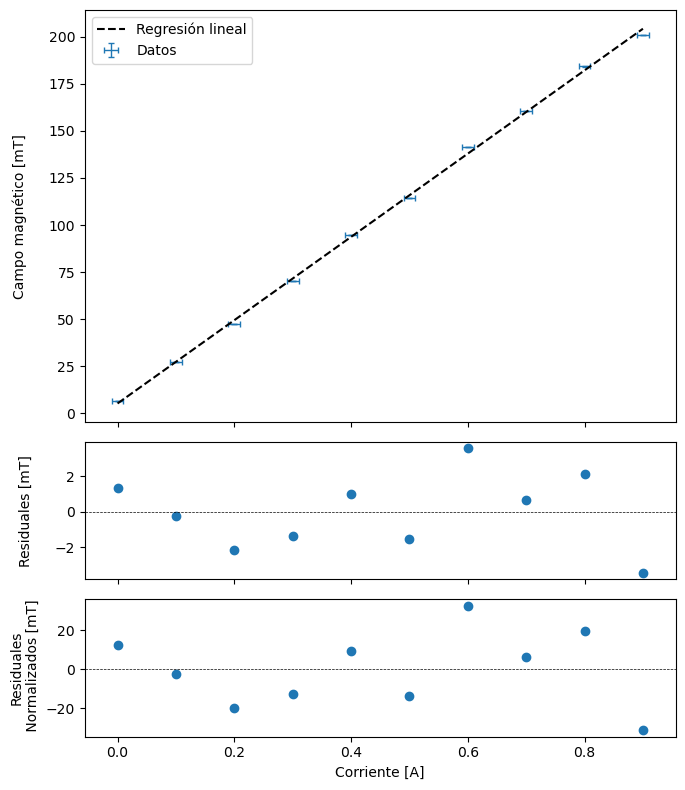

In [60]:
I = np.array([0.000, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ei = np.array(0.01*np.ones(len(I)))
B = np.array([6.6, 27.1, 47.3, 70.2, 94.7,114.3, 141.5, 160.7, 184.3, 200.8 ])
eB = np.array(0.1*np.ones(len(B)))
minimos_cuadrados_incertidumbre(I,B,ei,eB)
#mili Tesla

Tarjeta n
200 mH

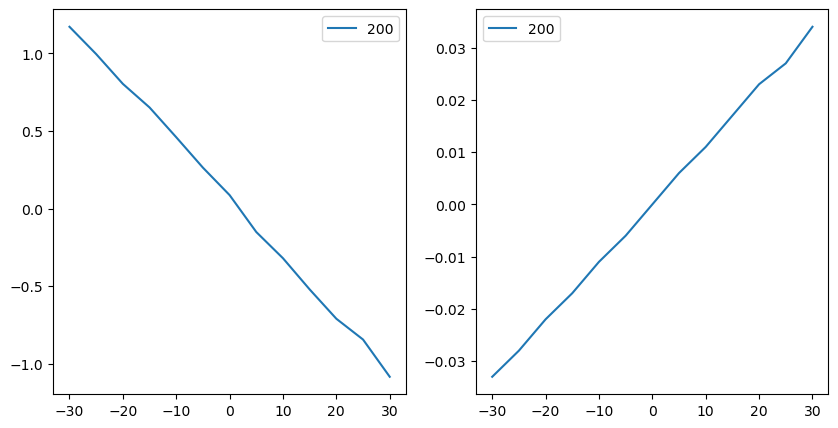

In [109]:
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA
Vl = np.array([1.172,0.996, 0.804, 0.652, 0.460, 0.264, 0.087, -0.151, -0.320, -0.521, -0.710, -0.844, -1.084])
Vh = np.array([-0.033, -0.028,-0.022, -0.017, -0.011, -0.006, 0, 0.006, 0.011, 0.017, 0.023, 0.027, 0.034])




fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(I, Vl, label = "200")

ax1.legend()


ax2.plot(I, Vh, label = "200")
ax2.legend()


160.03

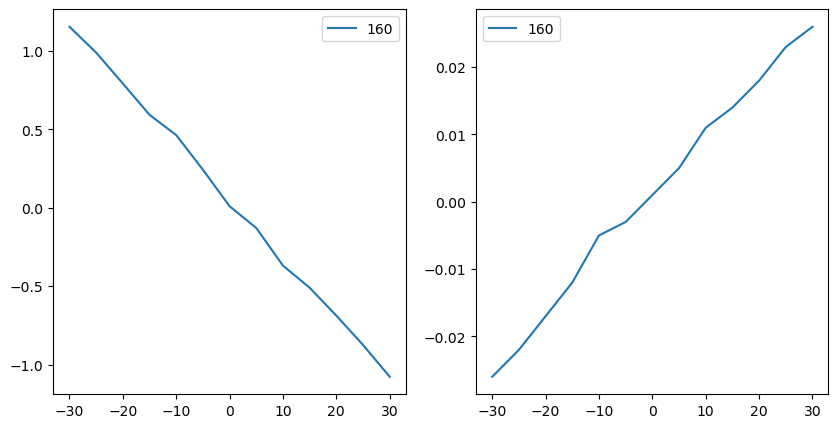

In [110]:
I = np.array([30,25, 20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30])
Vl_2 = np.array([-1.078,-0.875, -0.688, -0.510,  -0.369, -0.129, 0.01, 0.243, 0.464, 0.593, 0.793, 0.990, 1.155])
Vh_2 = np.array([0.026, 0.023, 0.018, 0.014, 0.011, 0.005, 0.001, -0.003, -0.005, -0.012, -0.017, -0.022, -0.026])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(I, Vl_2, label = "160")

ax1.legend()


ax2.plot(I, Vh_2, label = "160")
ax2.legend()

93.69 mT

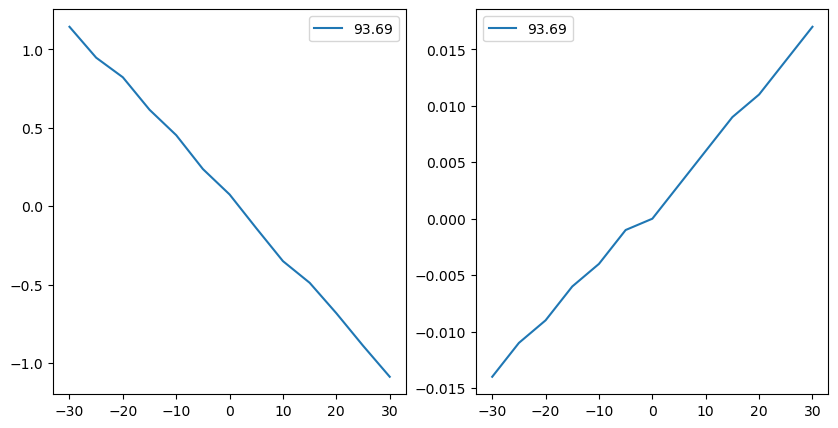

In [111]:
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA
Vl_3 = np.array([1.144, 0.947, 0.822, 0.615, 0.453, 0.237, 0.075,-0.140, -0.350, -0.488, -0.682,-0.889, -1.087 ])
Vh_3 = np.array([-0.014, -0.011, -0.009, -0.006, -0.004, -0.001, 0,0.003, 0.006, 0.009, 0.011, 0.014, 0.017])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(I, Vl_3, label = "93.69")

ax1.legend()


ax2.plot(I, Vh_3, label = "93.69")
ax2.legend()

49.46

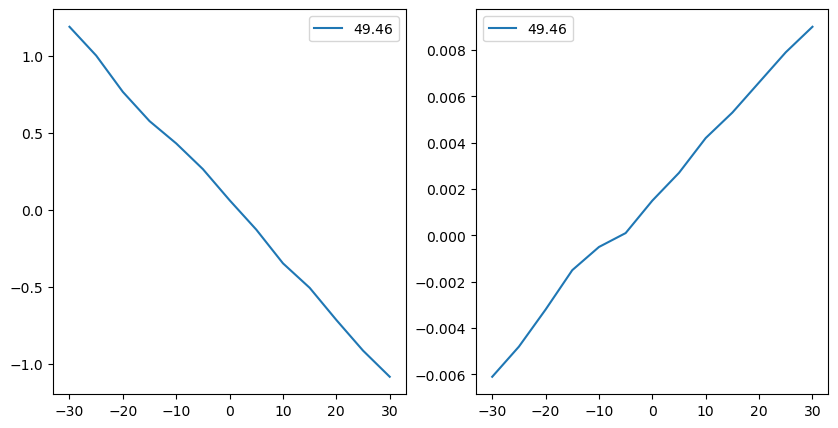

In [112]:
I = np.array([30,25, 20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30])
Vl_4 = np.array([-1.086, -0.916, -0.717, -0.508, -0.349, -0.130, 0.061, 0.263, 0.43, 0.575, 0.765, 1.001, 1.188])
Vh_4 = np.array([0.009, 0.0079, 0.0066, 0.0053, 0.0042, 0.0027, 0.0015, 0.0001, -0.0005, -0.0015, -0.0032, -0.0048, -0.0061])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(I, Vl_4, label = "49.46")

ax1.legend()


ax2.plot(I, Vh_4, label = "49.46")
ax2.legend()


B = 25.14

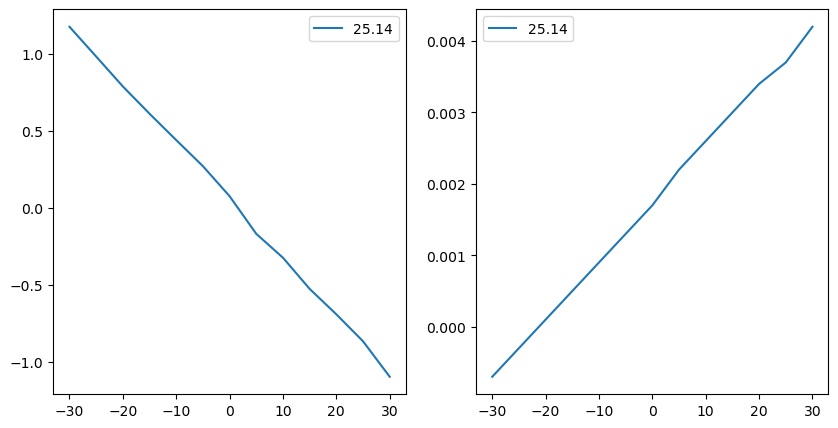

In [113]:
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA
Vl_5 = np.array([1.174, 0.981, 0.787, 0.610, 0.439, 0.270, 0.075, -0.169, -0.324, -0.526, -0.691, -0.866, -1.096])
Vh_5 = np.array([-0.7, -0.3, 0.1, 0.5, 0.9, 1.3, 1.7,2.2, 2.6, 3, 3.4, 3.7, 4.2 ])*10**(-3)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(I, Vl_5, label = "25.14")

ax1.legend()


ax2.plot(I, Vh_5, label = "25.14")
ax2.legend()

Regresiones

In [66]:
m,b,eb,em,a = minimos_cuadrados_incertidumbre_2(I, Vl,1,0.01*np.ones(len(I)))
m2,b2,eb2,em2,a2 = minimos_cuadrados_incertidumbre_2(I, Vl_2[::-1],1,0.01*np.ones(len(I)))
m3,b3,eb3,em3,a3 = minimos_cuadrados_incertidumbre_2(I, Vl_3,1,0.01*np.ones(len(I)))
m4,b4,eb4,em4,a4 = minimos_cuadrados_incertidumbre_2(I, Vl_4[::-1],1,0.01*np.ones(len(I)))
m5,b5,eb5,em5,a5 = minimos_cuadrados_incertidumbre_2(I, Vl_5,1,0.01*np.ones(len(I)))



mh,bh,ebh,emh,ah = minimos_cuadrados_incertidumbre_2(I[::-1], Vh,1,0.01*np.ones(len(I)))
m2h,b2h,eb2h,em2h,a2h = minimos_cuadrados_incertidumbre_2(I[::-1], Vh_2[::-1],1,0.01*np.ones(len(I)))
m3h,b3h,eb3h,em3h,a3h = minimos_cuadrados_incertidumbre_2(I[::-1], Vh_3,1,0.01*np.ones(len(I)))
m4h,b4h,eb4h,em4h,a4h = minimos_cuadrados_incertidumbre_2(I[::-1], Vh_4[::-1],1,0.01*np.ones(len(I)))
m5h,b5h,eb5h,em5h,a5h = minimos_cuadrados_incertidumbre_2(I[::-1], Vh_5,1,0.01*np.ones(len(I)))




print(mh)
print(m2h)
print(m3h)
print(m4h)
print(m5h)


print(emh)
print(em2h)
print(em3h)
print(em4h)
print(em5h)

-0.0011153846153846153
-0.0008736263736263736
-0.0005054945054945055
-0.00024802197802197804
-8.175824175824176e-05
0.00014824986333222023
0.00014824986333222023
0.00014824986333222023
0.00014824986333222023
0.00014824986333222023


Nuevas cosas

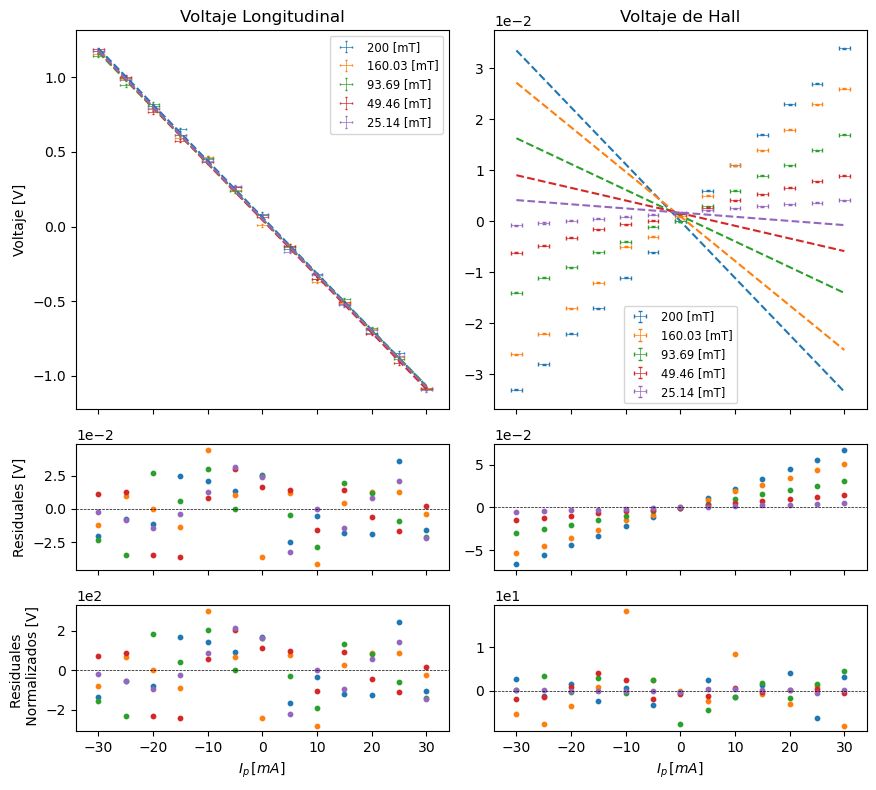

In [67]:
fig, axs = plt.subplots(3, 2, figsize=(9, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})


axs[0,0].errorbar(I, Vl, color="#1f77b4",label = "200 [mT]",  fmt=' ', yerr = 0.01, xerr = 1, capsize=1, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I, Vl_2[::-1],color="#ff7f0e", label = "160.03 [mT]",  fmt=' ', yerr = 0.01, xerr = 1, capsize=1, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I, Vl_3, color="#2ca02c",label = "93.69 [mT]",  fmt=' ', yerr = 0.01, xerr = 1, capsize=1, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I, Vl_4[::-1],color="#d62728", label = "49.46 [mT]",  fmt=' ', yerr = 0.01, xerr = 1, capsize=1, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I, Vl_5, color="#9467bd",label = "25.14 [mT]",  fmt=' ', yerr = 0.01, xerr = 1, capsize=1, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].legend(fontsize='small')
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[0,0].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador

axs[0,0].plot(I, m*I+b, color="#1f77b4",  linestyle='--')
axs[0,0].plot(I, m2*I+b2, color="#ff7f0e",  linestyle='--')
axs[0,0].plot(I, m3*I+b3, color="#2ca02c",  linestyle='--')
axs[0,0].plot(I, m4*I+b4, color="#d62728",  linestyle='--')
axs[0,0].plot(I, m5*I+b5, color="#9467bd",  linestyle='--')


axs[0,1].plot(I, mh*I+bh, color="#1f77b4",  linestyle='--')
axs[0,1].plot(I, m2h*I+b2h, color="#ff7f0e",  linestyle='--')
axs[0,1].plot(I, m3h*I+b3h, color="#2ca02c",  linestyle='--')
axs[0,1].plot(I, m4h*I+b4h, color="#d62728",  linestyle='--')
axs[0,1].plot(I, m5h*I+b5h, color="#9467bd",  linestyle='--')


axs[1,0].scatter(I,Vl -(m*I+b), s=10)
axs[1,0].scatter(I,Vl_2[::-1] -(m2*I+b2),s=10)
axs[1,0].scatter(I,Vl_3 -(m3*I+b3),s=10)
axs[1,0].scatter(I,Vl_4[::-1] -(m4*I+b4),s=10)
axs[1,0].scatter(I,Vl_5 -(m5*I+b5),s=10)
axs[1,0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[1,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,0].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador


axs[1,1].scatter(I,Vh -(mh*I+bh), s=10)
axs[1,1].scatter(I,Vh_2[::-1] -(m2h*I+b2h),s=10)
axs[1,1].scatter(I,Vh_3 -(m3h*I+b3h),s=10)
axs[1,1].scatter(I,Vh_4[::-1] -(m4h*I+b4h),s=10)
axs[1,1].scatter(I,Vh_5 -(m5h*I+b5h),s=10)
axs[1,1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[1,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,1].yaxis.get_offset_text().set_visible(True) 


axs[2,0].scatter(I,a, s=10)
axs[2,0].scatter(I,a2,s=10)
axs[2,0].scatter(I,a3,s=10)
axs[2,0].scatter(I,a4,s=10)
axs[2,0].scatter(I,a5,s=10)
axs[2,0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[2,0].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador



axs[2,1].scatter(I,ah, s=10)
axs[2,1].scatter(I,a2h,s=10)
axs[2,1].scatter(I,a3h,s=10)
axs[2,1].scatter(I,a4h,s=10)
axs[2,1].scatter(I,a5h,s=10)
axs[2,1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[2,1].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador


axs[0,1].errorbar(I, Vh,color="#1f77b4", label = "200 [mT]",   fmt=' ', yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I, Vh_2[::-1],color="#ff7f0e", label = "160.03 [mT]", fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I, Vh_3, color="#2ca02c",label = "93.69 [mT]", fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I, Vh_4[::-1],color="#d62728", label = "49.46 [mT]",  fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I, Vh_5,color="#9467bd", label = "25.14 [mT]",  fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].legend(fontsize='small')
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[0,1].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador


axs[0,0].set_title("Voltaje Longitudinal")
axs[0,1].set_title("Voltaje de Hall")
axs[0,0].set_ylabel("Voltaje [V]")
axs[1,0].set_ylabel("Residuales [V]")
axs[2,0].set_ylabel("Residuales \n Normalizados [V]")
axs[2,0].set_xlabel(r"$I_p \, [mA]$ ")
axs[2,1].set_xlabel(r"$I_p \, [mA]$ ")

plt.tight_layout()



In [68]:
print(mh,m2h,m3h,m4h,m5h)

-0.0011153846153846153 -0.0008736263736263736 -0.0005054945054945055 -0.00024802197802197804 -8.175824175824176e-05


2.I_p = -20

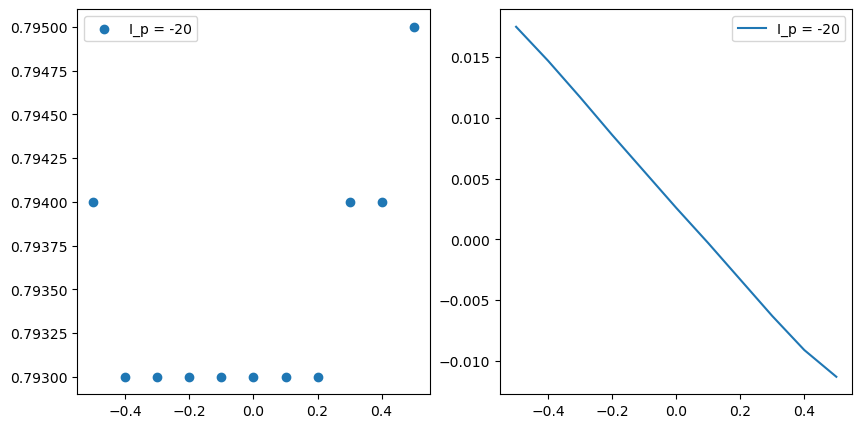

In [70]:
I = np.array([ 0.5, 0.4, 0.3, 0.2, 0.1, 0, -0.1, -0.2, -0.3, -0.4, -0.5])#mA
Vl = np.array([0.795, 0.794, 0.794, 0.793, 0.793, 0.793, 0.793, 0.793, 0.793, 0.793, 0.794])
Vh__1 = np.array([-11.3, -9.1, -6.3, -3.3, -0.3, 2.6, 5.6, 8.6, 11.7, 14.7, 17.5])*10**-3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(I, Vl, label = "I_p = -20")

ax1.legend()


ax2.plot(I, Vh__1, label = "I_p = -20")
ax2.legend()

I_p = 10

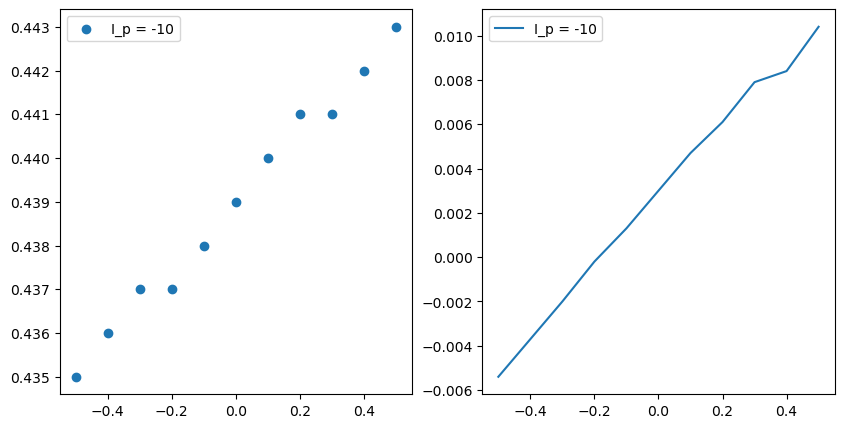

In [72]:
I = np.array([ -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5])#mA
Vl = np.array([0.435, 0.436, 0.437, 0.437, 0.438, 0.439,0.440, 0.441 , 0.441, 0.442, 0.443])
Vh__2 = (np.array([10.4, 8.4, 7.9, 6.1, 4.7, 3, 1.3,-0.2, -2, -3.7, -5.4])*10**-3)[::-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(I, Vl, label = "I_p = -10")

ax1.legend()


ax2.plot(I, Vh__2, label = "I_p = -10")
ax2.legend()

Ip = 5

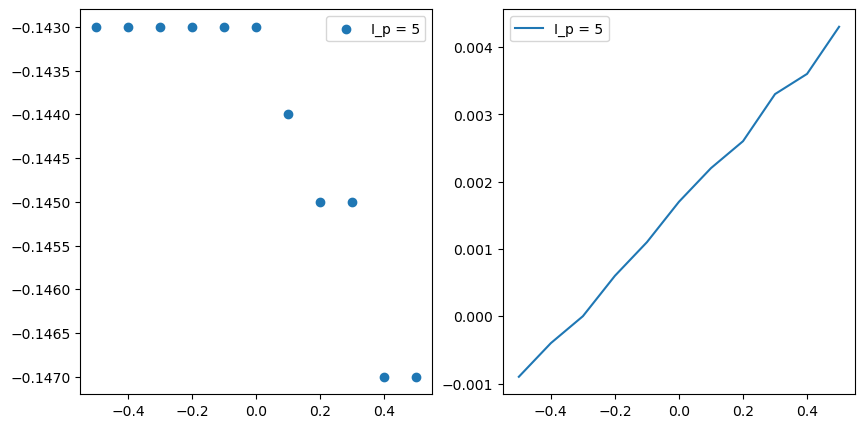

In [73]:
I = np.array([ 0.5, 0.4, 0.3, 0.2, 0.1, 0, -0.1, -0.2, -0.3, -0.4, -0.5])#mA
Vl = np.array([-0.147, -0.147, -0.145,-0.145, -0.144,-0.143, -0.143, -0.143, -0.143, -0.143, -0.143 ])
Vh__3 = np.array([4.3, 3.6, 3.3,2.6, 2.2, 1.7, 1.1, 0.6, 0, -0.4, -0.9])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(I, Vl, label = "I_p = 5")

ax1.legend()


ax2.plot(I, Vh__3, label = "I_p = 5")
ax2.legend()

Ip = 10

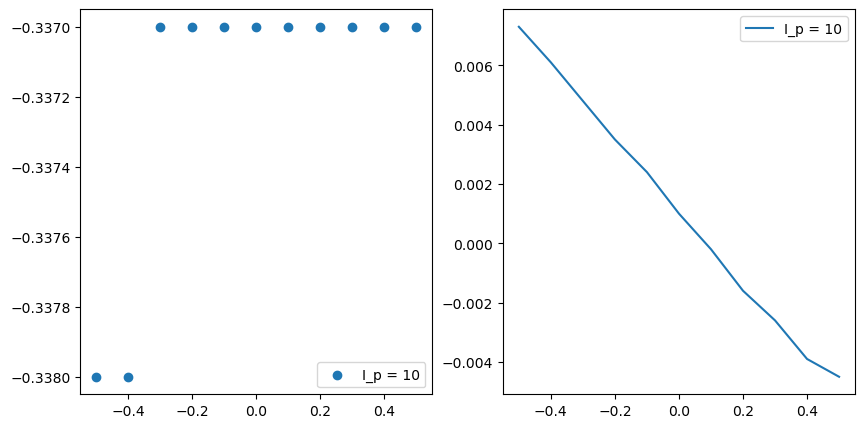

In [74]:
I = np.array([ -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5])#mA
Vl = np.array([-0.338, -0.338, -0.337, -0.337, -0.337, -0.337, -0.337, -0.337, -0.337, -0.337, -0.337])
Vh__4 = (np.array([-4.5, -3.9, -2.6, -1.6, -0.2, 1,2.4, 3.5, 4.8, 6.1, 7.3])*10**-3)[::-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(I, Vl, label = "I_p = 10")

ax1.legend()


ax2.plot(I, Vh__4, label = "I_p = 10")
ax2.legend()

Ip = 20

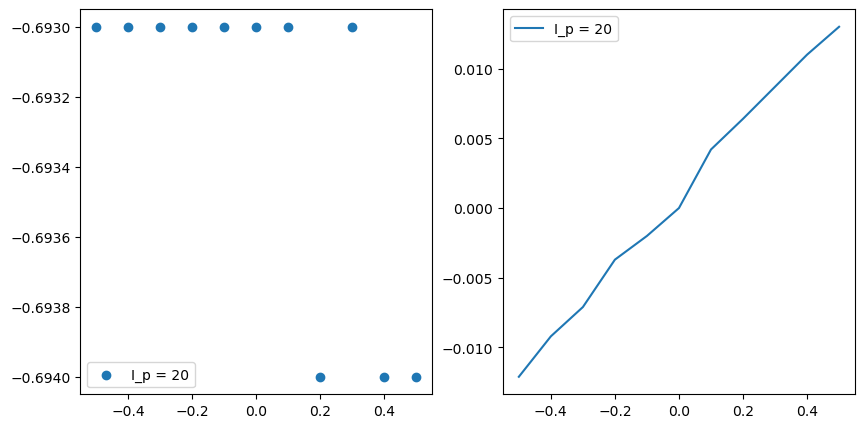

In [75]:
I = np.array([ 0.5, 0.4, 0.3, 0.2, 0.1, 0, -0.1, -0.2, -0.3, -0.4, -0.5])#mA
Vl = np.array([-0.694, -0.694, -0.693, -0.694, -0.693, -0.693, -0.693, -0.693,  -0.693, -0.693,  -0.693])
Vh__5 = np.array([13, 11,8.7, 6.4, 4.2, 0, -2, -3.7, -7.1, -9.2, -12.1  ])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(I, Vl, label = "I_p = 20")

ax1.legend()


ax2.plot(I, Vh__5, label = "I_p = 20")
ax2.legend()


Temperatura 
Ip= 30
izquierda longitudinal derecha hall

Ip = 30
B = 300
I =1.3329

2. Video Intrinseca

# Tarjeta p

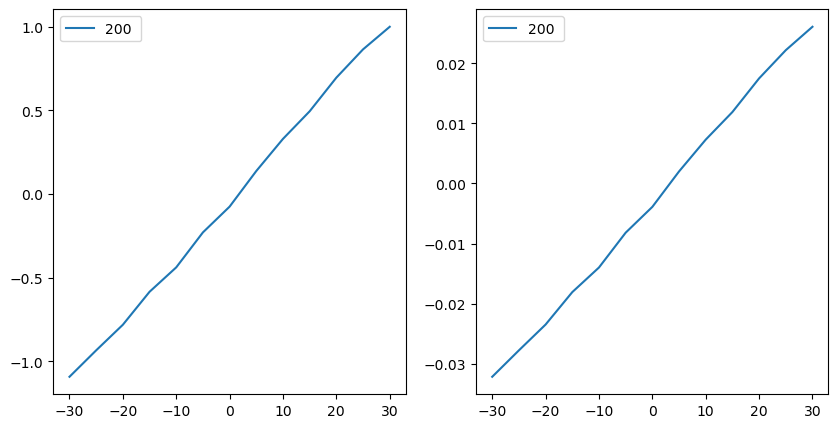

In [76]:
#200

I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA
vl_1 = np.array([-1.092, -0.934, -0.781, -0.584, -0.438, -0.229, -0.075, 0.138, 0.33, 0.495, 0.696, 0.865, 1])
vh_1 = np.array([-32.2, -27.8,-23.5, -18.1, -14, -8.2, -3.9, 2 , 7.3, 11.9, 17.5, 22.2 , 26.1 ])*10**-3



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(I, vl_1, label = "200 ")

ax1.legend()


ax2.plot(I, vh_1, label = "200 ")
ax2.legend()


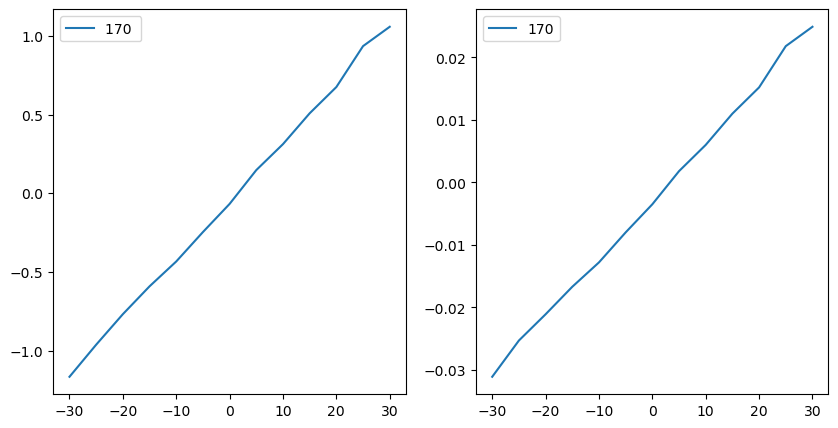

In [77]:
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA

vl_2 = np.array([-1.167,-0.963,-0.769, -0.592, -0.434, -0.247, -0.068, 0.147, 0.312, 0.508, 0.675, 0.935,1.058 ])
vh_2 = np.array([-31.1, -25.3, -21.1, -16.7, -12.8, -8, -3.5, 1.8, 6, 11, 15.2, 21.8, 24.9])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(I, vl_2, label = "170 ")

ax1.legend()

ax2.plot(I, vh_2, label = "170")
ax2.legend()


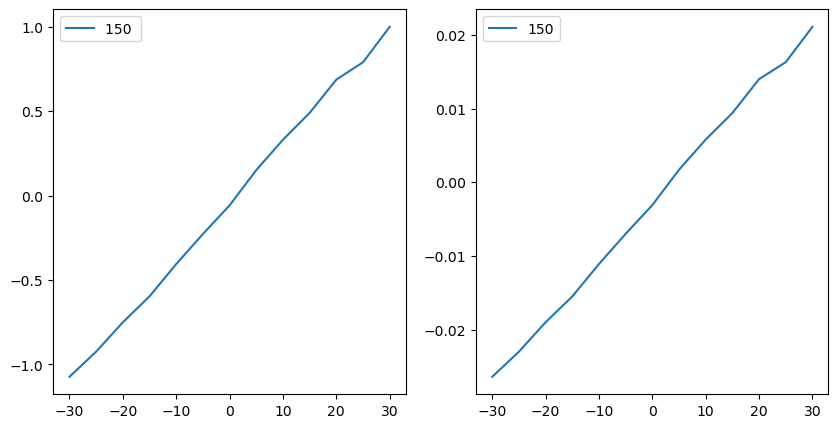

In [78]:
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA

vl_3 = np.array([-1.074, -0.925, -0.751, -0.597, -0.406, -0.228, -0.058, 0.151 , 0.331, 0.490,0.687, 0.790, 1])
vh_3 = np.array([-26.4, -23, -19, -15.5, -11.1, -7, -3.1, 1.7, 5.8, 9.4, 14, 16.3, 21.1])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(I, vl_3, label = "150 ")

ax1.legend()


ax2.plot(I, vh_3, label = "150")
ax2.legend()

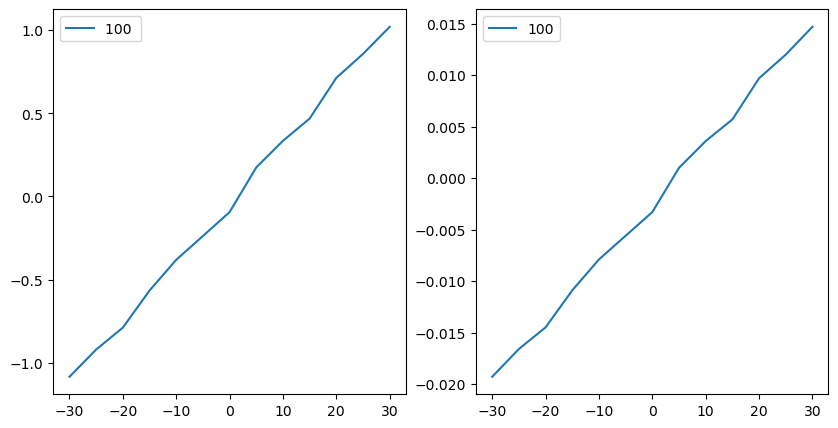

In [80]:
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA

vl_4 = np.array([-1.085,-0.921,-0.789,-0.566,-0.381, -0.238, -0.094,0.175, 0.335, 0.469, 0.714, 0.858,  1.021 ])
vh_4 = np.array([-19.3, -16.6, -14.5,-10.9,-7.9, -5.6 , -3.3,1 , 3.6, 5.7, 9.7 ,12,14.7 ])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(I, vl_4, label = "100 ")

ax1.legend()


ax2.plot(I, vh_4, label = "100")
ax2.legend()

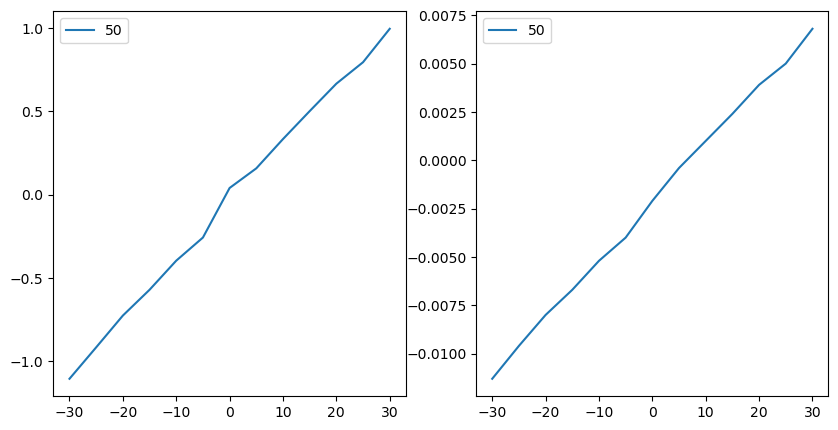

In [81]:
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA

vl_5 = np.array([ -1.107, -0.918, -0.727, -0.572, -0.397, -0.258, 0.04, 0.158,0.334, 0.502, 0.667 , 0.796, 0.997])
vh_5 = np.array([-11.3, -9.6, -8, -6.7, -5.2, -4, -2.1, -0.4, 1, 2.4, 3.9, 5, 6.8])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(I, vl_5, label = "50")

ax1.legend()


ax2.plot(I, vh_5, label = "50")
ax2.legend()

Ajuste

In [82]:
mh_,bh_,ebh_,emh_,ah_ = minimos_cuadrados_incertidumbre_2(I, vh_1,1,0.01*np.ones(len(I)))
m2h_,b2h_,eb2h_,em2h_,a2h_ = minimos_cuadrados_incertidumbre_2(I, vh_2,1,0.01*np.ones(len(I)))
m3h_,b3h_,eb3h_,em3h_,a3h_ = minimos_cuadrados_incertidumbre_2(I, vh_3,1,0.01*np.ones(len(I)))
m4h_,b4h_,eb4h_,em4h_,a4h_ = minimos_cuadrados_incertidumbre_2(I, vh_4,1,0.01*np.ones(len(I)))
m5h_,b5h_,eb5h_,em5h_,a5h_ = minimos_cuadrados_incertidumbre_2(I, vh_5,1,0.01*np.ones(len(I)))


[-1.11538462e-03 -8.73626374e-04 -5.05494505e-04 -2.48021978e-04
 -8.17582418e-05]
[0.00014825 0.00014825 0.00014825 0.00014825 0.00014825]
1.380868601279006e-06
[-5.57692308e-06 -5.45914125e-06 -5.39539444e-06 -5.01459721e-06
 -3.25211781e-06]
[4.98131868e-06 5.47640595e-06 5.35311355e-06 5.74945055e-06
 5.98901099e-06]


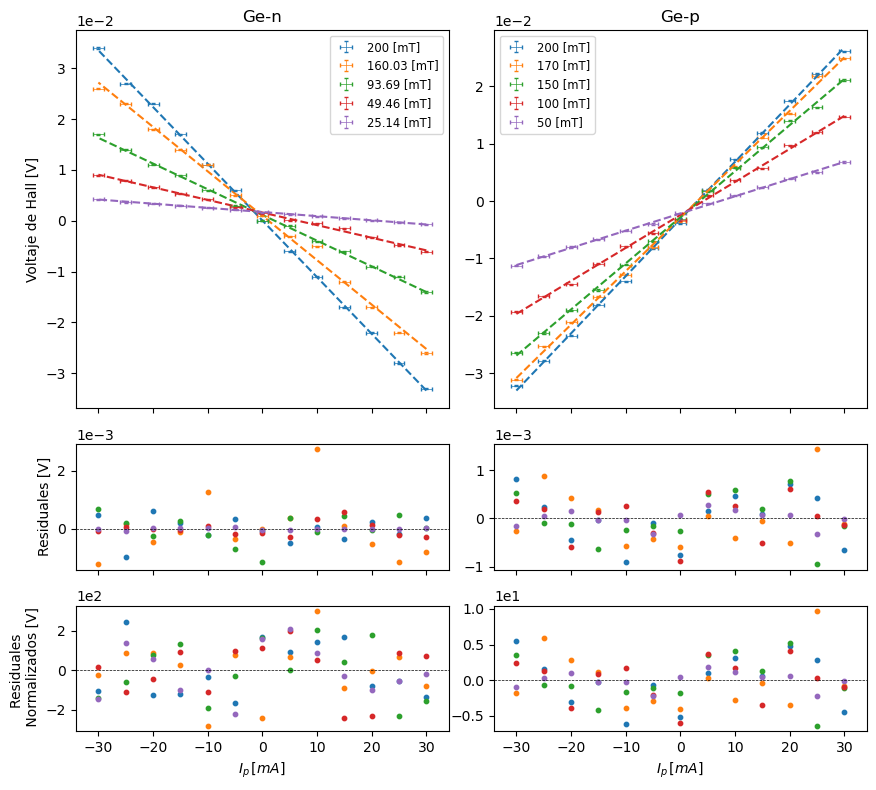

In [83]:
fig, axs = plt.subplots(3, 2, figsize=(9, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})

#nmos
axs[0,0].plot(I[::-1], mh*I[::-1]+bh, color="#1f77b4",  linestyle='--')
axs[0,0].plot(I[::-1], m2h*I[::-1]+b2h, color="#ff7f0e",  linestyle='--')
axs[0,0].plot(I[::-1], m3h*I[::-1]+b3h, color="#2ca02c",  linestyle='--')
axs[0,0].plot(I[::-1], m4h*I[::-1]+b4h, color="#d62728",  linestyle='--')
axs[0,0].plot(I[::-1], m5h*I[::-1]+b5h, color="#9467bd",  linestyle='--')


axs[1,0].scatter(I[::-1],Vh - (mh*I[::-1]+bh), s=10)
axs[1,0].scatter(I[::-1],Vh_2[::-1] -(m2h*I[::-1]+b2h),s=10)
axs[1,0].scatter(I[::-1],Vh_3 -(m3h*I[::-1]+b3h),s=10)
axs[1,0].scatter(I[::-1],Vh_4[::-1] -(m4h*I[::-1]+b4h),s=10)
axs[1,0].scatter(I[::-1],Vh_5 -(m5h*I[::-1]+b5h),s=10)
axs[1,0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[1,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,0].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador


axs[2,0].scatter(I[::-1],a, s=10)
axs[2,0].scatter(I[::-1],a2,s=10)
axs[2,0].scatter(I[::-1],a3,s=10)
axs[2,0].scatter(I[::-1],a4,s=10)
axs[2,0].scatter(I[::-1],a5,s=10)
axs[2,0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[2,0].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador



axs[0,0].errorbar(I[::-1], Vh,color="#1f77b4", label = "200 [mT]",   fmt=' ', yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I[::-1], Vh_2[::-1],color="#ff7f0e", label = "160.03 [mT]", fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I[::-1], Vh_3, color="#2ca02c",label = "93.69 [mT]", fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I[::-1], Vh_4[::-1],color="#d62728", label = "49.46 [mT]",  fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I[::-1], Vh_5,color="#9467bd", label = "25.14 [mT]",  fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].legend(fontsize='small')
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[0,0].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador




#Pmos


axs[0,1].errorbar(I, vh_1,color="#1f77b4", label = "200 [mT]",   fmt=' ', yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I, vh_2,color="#ff7f0e", label = "170 [mT]", fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I, vh_3, color="#2ca02c",label = "150 [mT]", fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I, vh_4,color="#d62728", label = "100 [mT]",  fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I, vh_5,color="#9467bd", label = "50 [mT]",  fmt=' ',  yerr = 0.1*10**(-3), xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].legend(fontsize='small')
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[0,1].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador



axs[0,1].plot(I, mh_*I+bh_,color="#1f77b4",linestyle='--')
axs[0,1].plot(I, m2h_*I+b2h_,color="#ff7f0e",linestyle='--')
axs[0,1].plot(I, m3h_*I+b3h_, color="#2ca02c",linestyle='--')
axs[0,1].plot(I, m4h_*I+b4h_,color="#d62728",linestyle='--')
axs[0,1].plot(I, m5h_*I+b5h_,color="#9467bd",linestyle='--')



axs[1,1].scatter(I, vh_1-(mh_*I+bh_),color="#1f77b4", s=10)
axs[1,1].scatter(I, vh_2-(m2h_*I+b2h_),color="#ff7f0e", s=10)
axs[1,1].scatter(I, vh_3-(m3h_*I+b3h_), color="#2ca02c", s=10)
axs[1,1].scatter(I, vh_4-(m4h_*I+b4h_),color="#d62728", s=10)
axs[1,1].scatter(I, vh_5-(m5h_*I+b5h_),color="#9467bd", s=10)

axs[1,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,1].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador
axs[1,1].axhline(0, color='black', linestyle='--', linewidth=0.5)


axs[2,1].scatter(I, ah_,color="#1f77b4", s=10)
axs[2,1].scatter(I, a2h_,color="#ff7f0e", s=10)
axs[2,1].scatter(I, a3h_, color="#2ca02c", s=10)
axs[2,1].scatter(I, a4h_,color="#d62728", s=10)
axs[2,1].scatter(I, a5h_,color="#9467bd", s=10)

axs[2,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[2,1].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador
axs[2,1].axhline(0, color='black', linestyle='--', linewidth=0.5)



axs[0,0].set_title("Ge-n")
axs[0,1].set_title("Ge-p")
axs[0,0].set_ylabel("Voltaje de Hall [V]")
axs[1,0].set_ylabel("Residuales [V]")
axs[2,0].set_ylabel("Residuales \n Normalizados [V]")
axs[2,0].set_xlabel(r"$I_p \, [mA]$ ")
axs[2,1].set_xlabel(r"$I_p \, [mA]$ ")



plt.tight_layout()


Bn = np.array([200,160.03,93.69,49.46, 25.14])
#Bn = np.array([230,200.03,130.69, 90.46, 35.14])
Bp = np.array([200, 170, 150, 100, 50])
mn = np.array([mh,m2h,m3h,m4h,m5h])
mp = np.array([mh_,m2h_,m3h_,m4h_,m5h_])
e_n = np.array([emh,em2h,em3h,em4h,em5h])

print(mn)
print(e_n)

sigma_n = np.sqrt(np.sum((e_n/Bn)*(e_n/Bn)))/5
print(sigma_n)
RH_n = mn/Bn
RH_p = mp/Bp
print(RH_n)
print(RH_p)



[-5.57692308 -5.45914125 -5.39539444 -5.01459721 -3.25211781]
[4.98131868 5.47640595 5.35311355 5.74945055 5.98901099]
-4.9396347576782675 5.509859943977591


<ErrorbarContainer object of 3 artists>

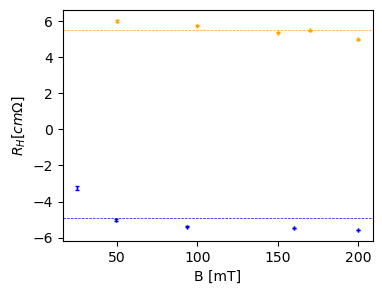

In [85]:
RH_n = mn/Bn*10**6
RH_p = mp/Bp*10**6
print(RH_n)
print(RH_p)


plt.figure(figsize=(4, 3))




val_n = np.sum(RH_n)/5
val_p = np.sum(RH_p)/5

plt.axhline(val_n, color='blue', linestyle='--', linewidth=0.5)
plt.axhline(val_p, color='orange', linestyle='--', linewidth=0.5)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel("B [mT]")
plt.ylabel(r"$R_H [cm\Omega]$")
print(val_n, val_p)
e = np.array([ebh,eb2h,eb3h,eb4h,eb5h])
e2 = np.array([ebh_,eb2h_,eb3h_,eb4h_,eb5h_])
en = np.sqrt((e*1e-3*10**6/Bn)**2+(mn*1e-3*10**6/Bn**2)**2)
ep = np.sqrt((e2*1e-3*10**6/Bp)**2+(mp*1e-3*10**6/Bp**2)**2)



plt.errorbar(Bn,RH_n,color="blue",   fmt=' ', yerr = en, xerr = 0.01, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
plt.errorbar(Bp,RH_p,color="orange",   fmt=' ', yerr = ep, xerr = 0.01, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)





Ip = -20

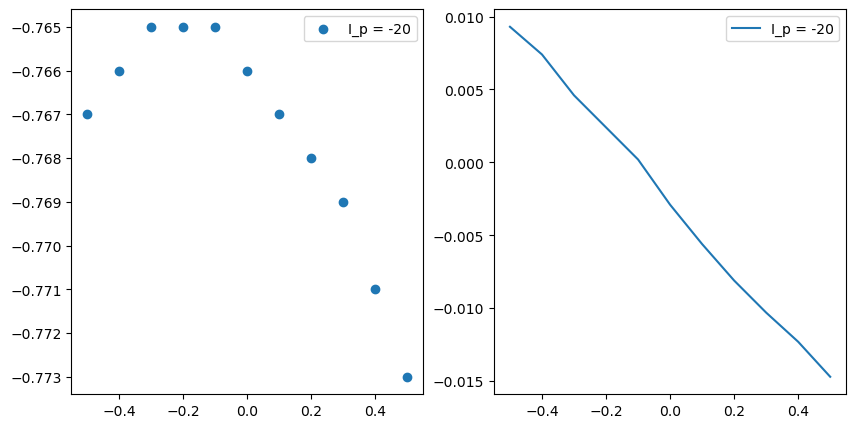

In [101]:
I1 = np.array([ 0.5, 0.4, 0.3, 0.2, 0.1, 0, -0.1, -0.2, -0.3, -0.4, -0.5])#mA
Vl = np.array([-0.773,-0.771, -0.769, -0.768, -0.767, -0.766, -0.765, -0.765, -0.765, -0.766, -0.767])
_Vh = np.array([-14.7,-12.3, -10.3, -8.1, -5.6, -2.9,0.2, 2.4, 4.6 , 7.4, 9.3])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(I1, Vl, label = "I_p = -20")

ax1.legend()


ax2.plot(I1, _Vh, label = "I_p = -20")
ax2.legend()


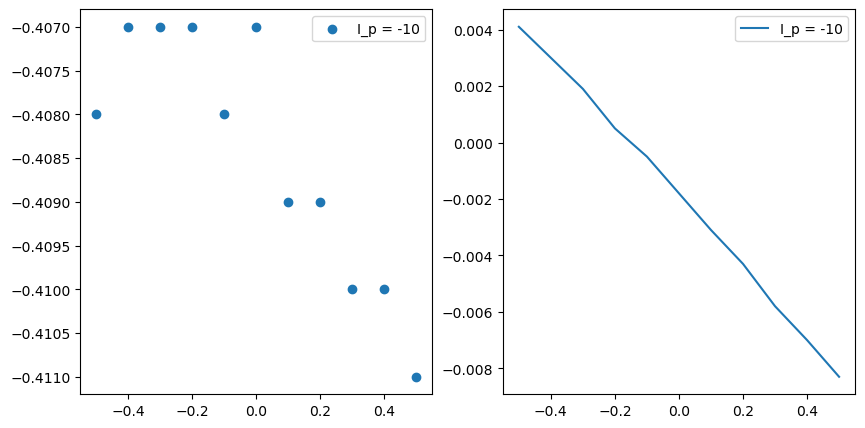

In [88]:
I = np.array([ 0.5, 0.4, 0.3, 0.2, 0.1, 0, -0.1, -0.2, -0.3, -0.4, -0.5])#mA
Vl = np.array([-0.411,-0.410,-0.410,-0.409,-0.409,-0.407,-0.408,-0.407,-0.407,-0.407,-0.408])
_2Vh = np.array([-8.3,-7,-5.8,-4.3,-3.1,-1.8,-0.5,0.5,1.9,3,4.1])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(I, Vl, label = "I_p = -10")

ax1.legend()


ax2.plot(I, _2Vh, label = "I_p = -10")
ax2.legend()


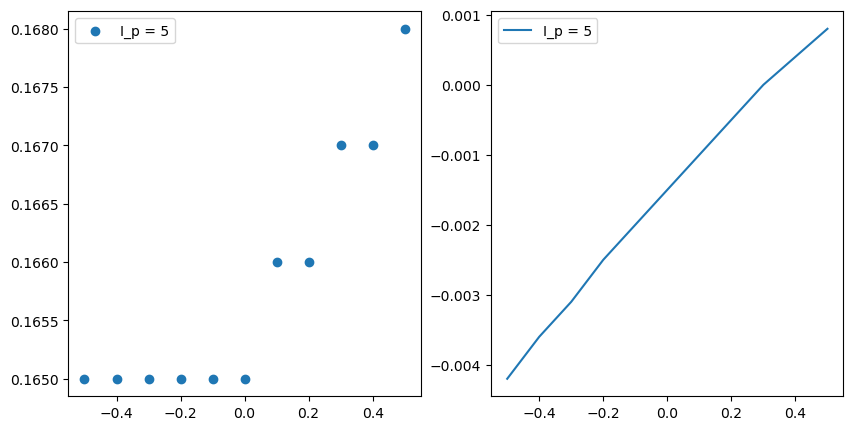

In [90]:
I = np.array([ 0.5, 0.4, 0.3, 0.2, 0.1, 0, -0.1, -0.2, -0.3, -0.4, -0.5])#mA
Vl = np.array([0.168, 0.167, 0.167, 0.166, 0.166, 0.165, 0.165,0.165, 0.165, 0.165, 0.165 ])
_3Vh = np.array([0.8,0.4, 0, -0.5, -1, -1.5,-2,-2.5, -3.1, -3.6, -4.2])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(I, Vl, label = "I_p = 5")

ax1.legend()


ax2.plot(I, _3Vh, label = "I_p = 5")
ax2.legend()

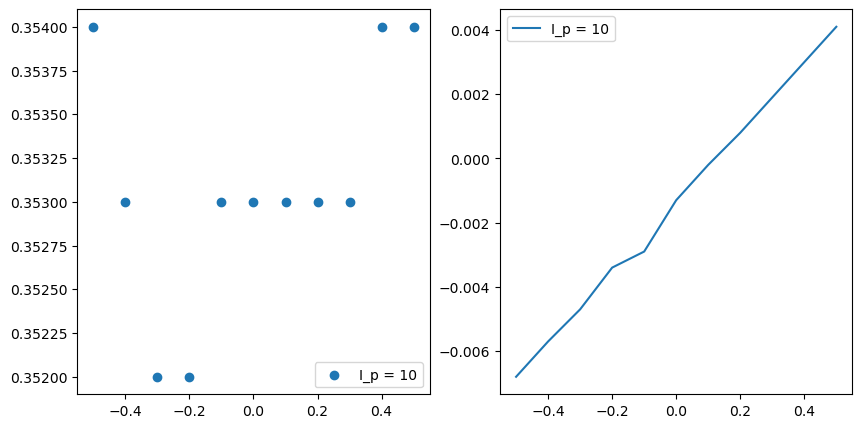

In [91]:
I = np.array([ 0.5, 0.4, 0.3, 0.2, 0.1, 0, -0.1, -0.2, -0.3, -0.4, -0.5])#mA
Vl = np.array([0.354, 0.354, 0.353, 0.353, 0.353 , 0.353, 0.353, 0.352, 0.352, 0.353, 0.354])
_4Vh = np.array([4.1, 3.0, 1.9, 0.8,-0.2, -1.3, -2.9, -3.4, -4.7, -5.7, -6.8])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(I, Vl, label = "I_p = 10")

ax1.legend()


ax2.plot(I, _4Vh, label = "I_p = 10")
ax2.legend()

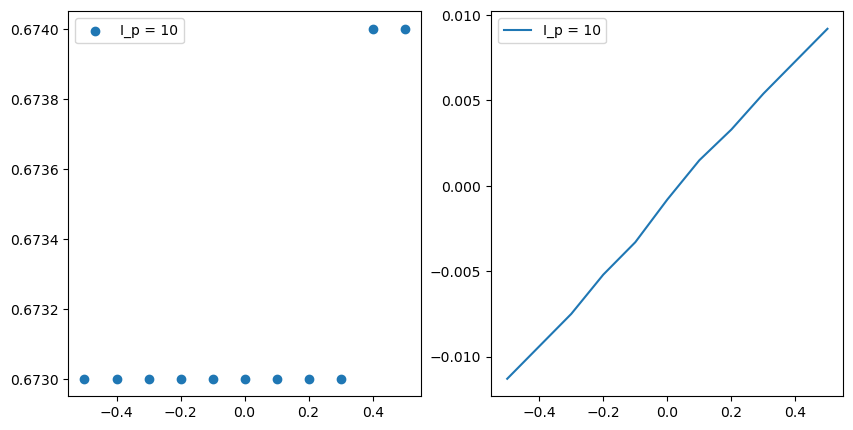

In [92]:
I = np.array([ 0.5, 0.4, 0.3, 0.2, 0.1, 0, -0.1, -0.2, -0.3, -0.4, -0.5])#mA
Vl = np.array([0.674, 0.674, 0.673, 0.673, 0.673, 0.673, 0.673, 0.673, 0.673, 0.673, 0.673])
_5Vh = np.array([9.2, 7.3,5.4, 3.3, 1.5, -0.8, -3.3, -5.2, -7.5, -9.4, -11.3])*10**-3


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(I, Vl, label = "I_p = 10")

ax1.legend()


ax2.plot(I, _5Vh, label = "I_p = 10")
ax2.legend()

Segundo video a 300 mT, izquierda hall, derecha longitudinal

In [473]:
##

Para n campo 0 

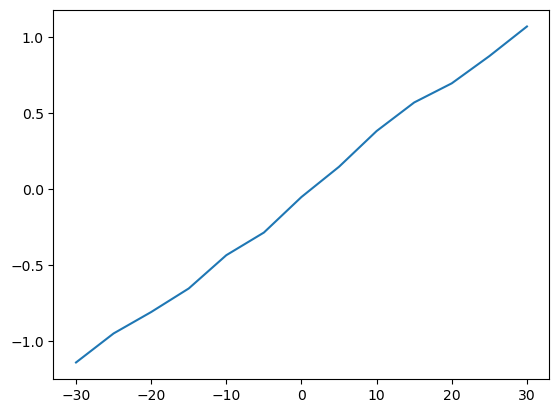

In [94]:
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA
V_l_1 = np.array([-1.141, -0.95, -0.809,-0.654, -0.435, -0.286, -0.052, 0.147, 0.382, 0.57, 0.696, 0.875, 1.07])#mA
plt.plot(I, V_l_1)

Para p campo 0

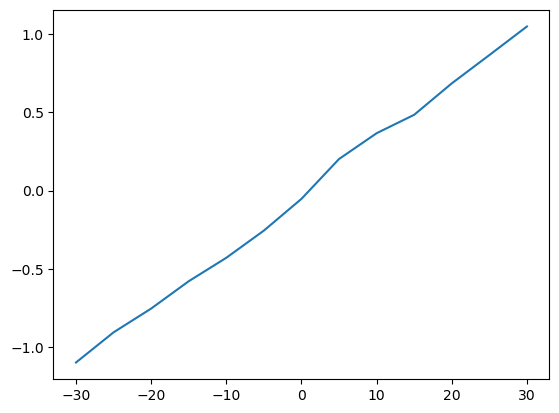

In [95]:
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA
V_l = np.array([-1.1, -0.907, -0.755, -0.58, -0.43, -0.256, -0.053, 0.202, 0.367, 0.485, 0.686, 0.867, 1.05])#mA
plt.plot(I, V_l)

0.03752747252747253
0.03602307692307692


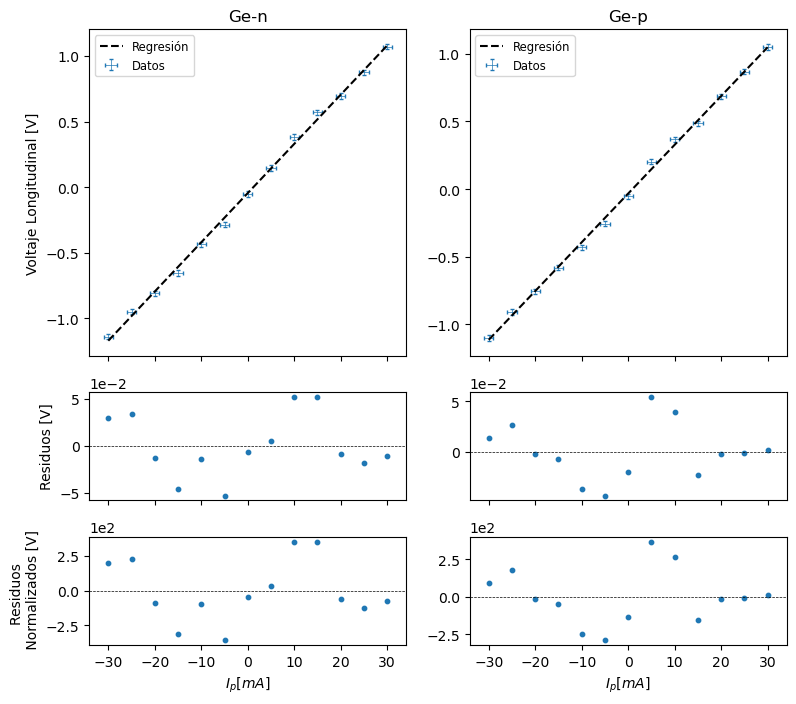

In [96]:
fig, axs = plt.subplots(3, 2, figsize=(9, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})

axs[0,0].errorbar(I, V_l_1, fmt =" ", xerr=1, yerr = 0.02, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5, label = "Datos")
axs[0,1].errorbar(I, V_l, fmt =" ", xerr=1, yerr = 0.02, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5, label = "Datos")

valores = minimos_cuadrados_incertidumbre_2(I, V_l_1, 1,0.01*np.ones(len(I)))
valores_1 = minimos_cuadrados_incertidumbre_2(I, V_l, 1,0.01*np.ones(len(I)))

axs[0,0].plot(I, valores[0]*I+valores[1], color = "black",linestyle='--', label = "Regresión")
axs[1,0].scatter(I, V_l_1-(valores[0]*I+valores[1]), s=10)
axs[0,1].plot(I, valores_1[0]*I+valores_1[1], color = "black",linestyle='--', label = "Regresión")
axs[1,1].scatter(I, V_l-(valores_1[0]*I+valores_1[1]),s=10)
axs[2,0].scatter(I, valores[4],s=10)
axs[2,1].scatter(I, valores_1[4],s=10)
axs[0,0].set_title("Ge-n")
axs[0,0].legend(fontsize = "small")
axs[0,1].legend(fontsize = "small")
axs[0,1].set_title("Ge-p")
axs[0,0].set_ylabel("Voltaje Longitudinal [V]")
axs[1,0].set_ylabel("Residuos [V]")
axs[2,0].set_ylabel("Residuos \n Normalizados [V]")
axs[2,1].set_xlabel(r"$I_p [mA]$")
axs[2,0].set_xlabel(r"$I_p [mA]$")
axs[2,0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2,1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[1,0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[1,1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[2,0].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador
axs[2,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[2,1].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador
axs[1,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,1].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador
axs[1,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,0].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador

R0 = valores[0]
R_1 = valores_1[0]
print(valores[0])
print(valores_1[0])

# Voltaje Hall

In [102]:
I2 = I1*221.13+5.24
I3 = I2[::-1]


Vh__4 = (np.array([-4.5, -3.9, -2.6, -1.6, -0.2, 1,2.4, 3.5, 4.8, 6.1, 7.3])*10**-3)[::-1]
val1= minimos_cuadrados_incertidumbre_2(I3,_Vh,1,0.2e-3*np.ones(len(I3)))
val2= minimos_cuadrados_incertidumbre_2(I3,_2Vh,1,0.2e-3*np.ones(len(I2)))
val3= minimos_cuadrados_incertidumbre_2(I3,_3Vh,1,0.2e-3*np.ones(len(I2)))
val4= minimos_cuadrados_incertidumbre_2(I3,_4Vh,1,0.2e-3*np.ones(len(I2)))
val5= minimos_cuadrados_incertidumbre_2(I3,_5Vh,1,0.2e-3*np.ones(len(I2)))


val1_= minimos_cuadrados_incertidumbre_2(I2,Vh__1,1,0.2e-3*np.ones(len(I2)))
val2_= minimos_cuadrados_incertidumbre_2(I2,Vh__2,1,0.2e-3*np.ones(len(I2)))
val3_= minimos_cuadrados_incertidumbre_2(I2,Vh__3,1,0.2e-3*np.ones(len(I2)))
val4_= minimos_cuadrados_incertidumbre_2(I2,Vh__4,1,0.2e-3*np.ones(len(I2)))
val5_= minimos_cuadrados_incertidumbre_2(I2,Vh__5,1,0.2e-3*np.ones(len(I2)))




Text(0, 0.5, 'Residuos \n Normalizados [V]')

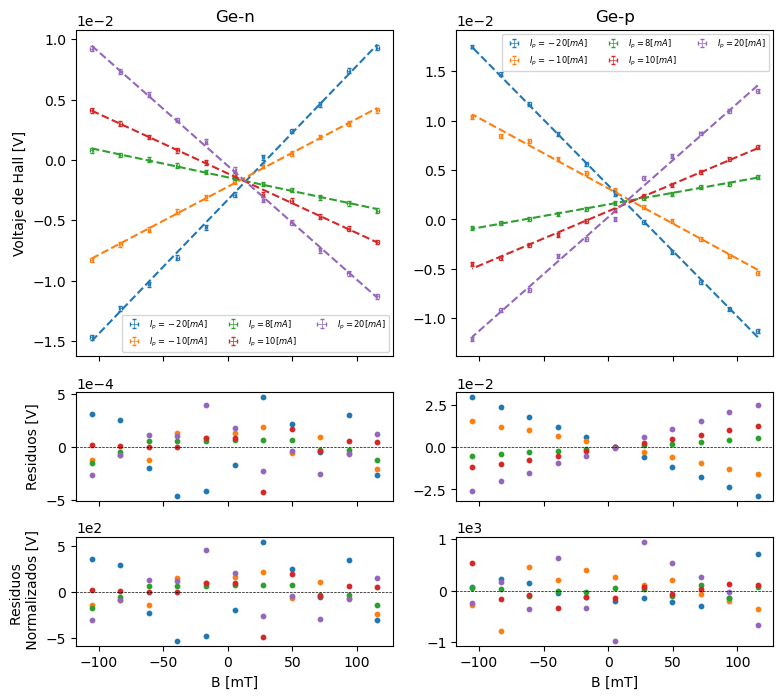

In [103]:
fig, axs = plt.subplots(3, 2, figsize=(9, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})



#Ge-n



axs[0,0].errorbar(I3, _Vh,color="#1f77b4", label=r"$I_p = -20 [mA]$", fmt = " ",xerr = 1, yerr = 0.2e-3,capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I3, _2Vh,color="#ff7f0e", label=r"$I_p = -10 [mA]$", fmt = " ",xerr = 1, yerr = 0.2e-3,capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I3, _3Vh, color="#2ca02c", label=r"$I_p = 8 [mA]$", fmt = " ",xerr = 1, yerr = 0.2e-3,capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I3, _4Vh,color="#d62728",  label=r"$I_p = 10 [mA]$", fmt = " ",xerr = 1, yerr = 0.2e-3,capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].errorbar(I3, _5Vh,color="#9467bd",  label=r"$I_p = 20 [mA]$", fmt = " ",xerr = 1, yerr = 0.2e-3,capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].plot(I3, val1[0]*I3+val1[1],color="#1f77b4",linestyle='--' )
axs[0,0].plot(I3, val2[0]*I3+val2[1],color="#ff7f0e",linestyle='--' )
axs[0,0].plot(I3, val3[0]*I3+val3[1],color="#2ca02c",linestyle='--' )
axs[0,0].plot(I3, val4[0]*I3+val4[1],color="#d62728",linestyle='--' )
axs[0,0].plot(I3, val5[0]*I3+val5[1],color="#9467bd",linestyle='--' )

axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[0,0].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador
axs[0,0].legend(ncol=3, fontsize=6)


axs[1,0].scatter(I3,_Vh-(val1[0]*I3+val1[1]) ,s=10)
axs[1,0].scatter(I3,_2Vh-(val2[0]*I3+val2[1]) ,s=10)
axs[1,0].scatter(I3,_3Vh-(val3[0]*I3+val3[1]) ,s=10)
axs[1,0].scatter(I3,_4Vh-(val4[0]*I3+val4[1]) ,s=10)
axs[1,0].scatter(I3,_5Vh-(val5[0]*I3+val5[1]) ,s=10)
axs[1,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,0].yaxis.get_offset_text().set_visible(True)
axs[1,0].axhline(0, color='black', linestyle='--', linewidth=0.5)

axs[2,0].scatter(I3,val1[4] ,s=10)
axs[2,0].scatter(I3,val2[4] ,s=10)
axs[2,0].scatter(I3,val3[4] ,s=10)
axs[2,0].scatter(I3,val4[4] ,s=10)
axs[2,0].scatter(I3,val5[4] ,s=10)
axs[2,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[2,0].yaxis.get_offset_text().set_visible(True)
axs[2,0].axhline(0, color='black', linestyle='--', linewidth=0.5)

#Ge-p

axs[0,1].errorbar(I2, Vh__1,color="#1f77b4", label=r"$I_p = -20 [mA]$", fmt = " ",xerr = 1, yerr = 0.2e-3,capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I2, Vh__2,color="#ff7f0e", label=r"$I_p = -10 [mA]$", fmt = " ",xerr = 1, yerr = 0.2e-3,capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I2, Vh__3, color="#2ca02c", label=r"$I_p = 8 [mA]$", fmt = " ",xerr = 1, yerr = 0.2e-3,capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I2, Vh__4,color="#d62728",  label=r"$I_p = 10 [mA]$", fmt = " ",xerr = 1, yerr = 0.2e-3,capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].errorbar(I2, Vh__5,color="#9467bd",  label=r"$I_p = 20 [mA]$", fmt = " ",xerr = 1, yerr = 0.2e-3,capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].plot(I2, val1_[0]*I2+val1_[1],color="#1f77b4",linestyle='--' )
axs[0,1].plot(I2, val2_[0]*I2+val2_[1],color="#ff7f0e",linestyle='--' )
axs[0,1].plot(I2, val3_[0]*I2+val3_[1],color="#2ca02c",linestyle='--' )
axs[0,1].plot(I2, val4_[0]*I2+val4_[1],color="#d62728",linestyle='--' )
axs[0,1].plot(I2, val5_[0]*I2+val5_[1],color="#9467bd",linestyle='--' )

axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[0,1].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador
axs[0,1].legend(ncol=3, fontsize=6)


axs[1,1].scatter(I2,Vh__1 -(val1_[0]*I2[::-1]+val1_[1]), s= 10)
axs[1,1].scatter(I2,Vh__2 -(val2_[0]*I2[::-1]+val2_[1]), s= 10)
axs[1,1].scatter(I2,Vh__3 -(val3_[0]*I2[::-1]+val3_[1]), s= 10)
axs[1,1].scatter(I2,Vh__4 -(val4_[0]*I2[::-1]+val4_[1]), s= 10)
axs[1,1].scatter(I2,Vh__5 -(val5_[0]*I2[::-1]+val5_[1]), s= 10)
axs[1,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,1].yaxis.get_offset_text().set_visible(True)
axs[1,1].axhline(0, color='black', linestyle='--', linewidth=0.5)



axs[2,1].scatter(I2,val1_[4], s= 10)
axs[2,1].scatter(I2,val2_[4], s= 10)
axs[2,1].scatter(I2,val3_[4], s= 10)
axs[2,1].scatter(I2,val4_[4], s= 10)
axs[2,1].scatter(I2,val5_[4], s= 10)
axs[2,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[2,1].yaxis.get_offset_text().set_visible(True)
axs[2,1].axhline(0, color='black', linestyle='--', linewidth=0.5)


#Labels
axs[2,0].set_xlabel("B [mT]")
axs[2,1].set_xlabel("B [mT]")
axs[0,1].set_title("Ge-p")
axs[0,0].set_title("Ge-n")
axs[0,0].set_ylabel("Voltaje de Hall [V]")
axs[0,0].set_ylabel("Voltaje de Hall [V]")
axs[1,0].set_ylabel("Residuos [V]")
axs[2,0].set_ylabel("Residuos \n Normalizados [V]")
#Ge-n

[-5.55617222 -5.6445612  -4.54689344 -4.9415605  -4.72367139]
[6.63739553 7.11634045 4.68667135 5.5088944  5.75761687]
-5.082571749238416
5.941383719161497


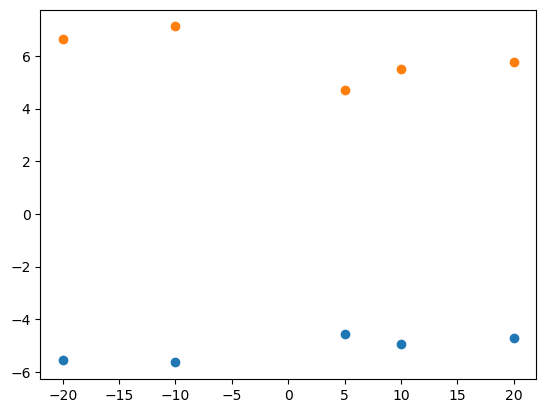

In [104]:
I_ = np.array([-20,-10,5,10,20])
m_n = np.array([val1[0],val2[0],val3[0],val4[0],val5[0]])
R_n = m_n/I_*10**6


m_p = np.array([val1_[0],val2_[0],val3_[0],val4_[0],val5_[0]])
R_p = m_p/I_*10**6
print(R_n)
print(R_p)
val__n = np.sum(R_n)/5
val__p = np.sum(R_p)/5
print(val__n)
print(val__p)

plt.scatter(I_, R_n)
plt.scatter(I_, R_p)


-4.9396347576782675 5.509859943977591


Text(180, 5.909859943977591, '$R_p = 5.51$ [$cm\\Omega$]')

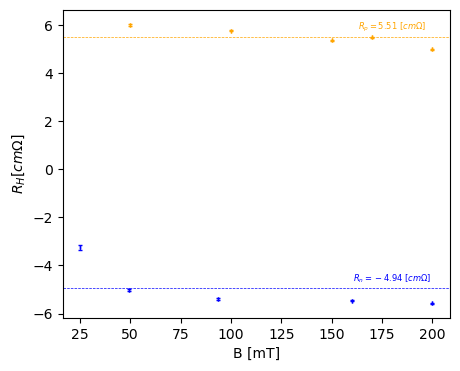

In [105]:
plt.figure(figsize=(5, 4))


plt.axhline(val_n, color='blue', linestyle='--', linewidth=0.5)
plt.axhline(val_p, color='orange', linestyle='--', linewidth=0.5)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel("B [mT]")
plt.ylabel(r"$R_H [cm\Omega]$")
print(val_n, val_p)
e = np.array([ebh,eb2h,eb3h,eb4h,eb5h])
e2 = np.array([ebh_,eb2h_,eb3h_,eb4h_,eb5h_])
en = np.sqrt((e*1e-3*10**6/Bn)**2+(mn*1e-3*10**6/Bn**2)**2)
ep = np.sqrt((e2*1e-3*10**6/Bp)**2+(mp*1e-3*10**6/Bp**2)**2)



plt.errorbar(Bn,RH_n,color="blue",   fmt=' ', yerr = en, xerr = 0.01, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
plt.errorbar(Bp,RH_p,color="orange",   fmt=' ', yerr = ep, xerr = 0.01, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
plt.text(180, val_n+0.4, r'$R_n = -4.94$ [$cm\Omega$]', fontsize=6, ha='center', va='center', color = "blue")
plt.text(180, val_p+0.4, r'$R_p = 5.51$ [$cm\Omega$]', fontsize=6, ha='center', va='center', color = "orange")

#####


In [106]:

en = np.sqrt((m_n*1e-3*10**6/I_)**2+(m_n*1e-3*10**6/I_**2)**2)
ep =np.sqrt((m_p*1e-3*10**6/I_)**2+(m_p*1e-3*10**6/I_**2)**2)

Text(15, 5.99, '$R_p = 5.59$ [$cm\\Omega$]')

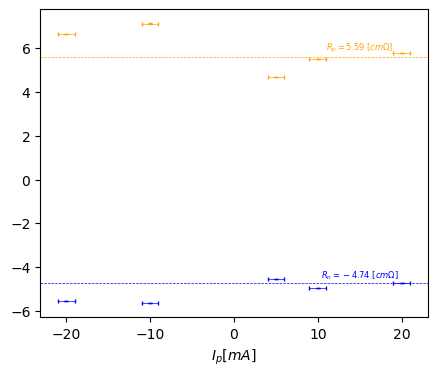

In [107]:
plt.figure(figsize=(5, 4))


plt.errorbar(I_, R_n,color = "blue", fmt=" ", yerr = en, xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
plt.errorbar(I_, R_p, color="orange",  fmt=" ", yerr = en, xerr = 1, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
plt.axhline(-4.74, color='blue', linestyle='--', linewidth=0.5)
plt.axhline(5.59, color='orange', linestyle='--', linewidth=0.5)
plt.xlabel(r"$I_p [mA]$")


plt.text(15, -4.74+0.4, r'$R_n = -4.74$ [$cm\Omega$]', fontsize=6, ha='center', va='center', color = "blue")
plt.text(15, 5.59+0.4, r'$R_p = 5.59$ [$cm\Omega$]', fontsize=6, ha='center', va='center', color = "orange")



# Comenzar de nuevo 

0.03752747252747253
0.03767692307692308
0.03735604395604396
0.03722417582417582
0.037754945054945054
0.03751648351648352


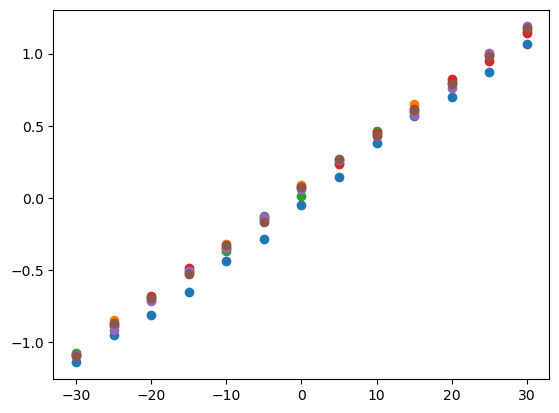

In [131]:
#n
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA
V_l_1 = np.array([-1.141, -0.95, -0.809,-0.654, -0.435, -0.286, -0.052, 0.147, 0.382, 0.57, 0.696, 0.875, 1.07])#mA
plt.scatter(I, V_l_1)
vak_1 = minimos_cuadrados_incertidumbre_2(I,V_l_1,1,0.01*np.ones(len(I)))
vak_2 = minimos_cuadrados_incertidumbre_2(I,Vl[::-1],1,0.01*np.ones(len(I)))
vak_3 = minimos_cuadrados_incertidumbre_2(I,Vl_2,1,0.01*np.ones(len(I)))
vak_4 = minimos_cuadrados_incertidumbre_2(I,Vl_3[::-1],1,0.01*np.ones(len(I)))
vak_5 = minimos_cuadrados_incertidumbre_2(I,Vl_4,1,0.01*np.ones(len(I)))
vak_6 = minimos_cuadrados_incertidumbre_2(I,Vl_5[::-1],1,0.01*np.ones(len(I)))
plt.scatter(I, Vl[::-1])
plt.scatter(I, Vl_2)
plt.scatter(I, Vl_3[::-1])
plt.scatter(I, Vl_4)
plt.scatter(I, Vl_5[::-1])
print(vak_1[0])
print(vak_2[0])
print(vak_3[0])
print(vak_4[0])
print(vak_5[0])
print(vak_6[0])
R_0 = vak_4[0]*1000
vals = np.array([vak_3[0],vak_6[0]-0.0001,vak_1[0],vak_2[0]+0.0001, vak_5[0] +0.0003 ])*1000

B = np.array([25.14, 49.46, 93.69,160, 200])

0.03602307692307692
0.035818681318681315
0.03714505494505495
0.03503846153846154
0.035706593406593407
0.03502197802197802


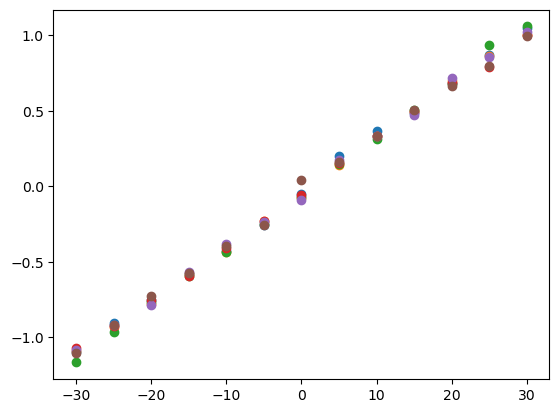

In [132]:
#p
I = np.array([-30, -25, -20, -15, -10, -5, 0, 5,10, 15, 20, 25, 30])#mA
V_l = np.array([-1.1, -0.907, -0.755, -0.58, -0.43, -0.256, -0.053, 0.202, 0.367, 0.485, 0.686, 0.867, 1.05])#mA
plt.scatter(I, V_l)
plt.scatter(I, vl_1)
plt.scatter(I, vl_2)
plt.scatter(I, vl_3)
plt.scatter(I, vl_4)
plt.scatter(I, vl_5)
vak0 = minimos_cuadrados_incertidumbre_2(I,V_l,1,0.01*np.ones(len(I)))


vak1 = minimos_cuadrados_incertidumbre_2(I,vl_1,1,0.01*np.ones(len(I)))
vak2 = minimos_cuadrados_incertidumbre_2(I,vl_2,1,0.01*np.ones(len(I)))
vak3 = minimos_cuadrados_incertidumbre_2(I,vl_3,1,0.01*np.ones(len(I)))
vak4 = minimos_cuadrados_incertidumbre_2(I,vl_4,1,0.01*np.ones(len(I)))
vak5 = minimos_cuadrados_incertidumbre_2(I,vl_5,1,0.01*np.ones(len(I)))

print(vak0[0])
print(vak1[0])
print(vak2[0])
print(vak3[0])
print(vak4[0])
print(vak5[0])
r_0 = vak5[0]*1000

vals_2 = np.array([vak3[0]+0.0005,vak4[0]-0.0001, vak1[0], vak0[0], vak2[0]-0.0009])*1000
B_ = np.array([50, 100, 150, 170, 200])

0.9963030643667097
0.9942085021741535
[4.31520743e-07 6.34335873e-06 3.44973528e-03]
[ 9.79532285e-07 -1.08168362e-04  1.76792584e-02]


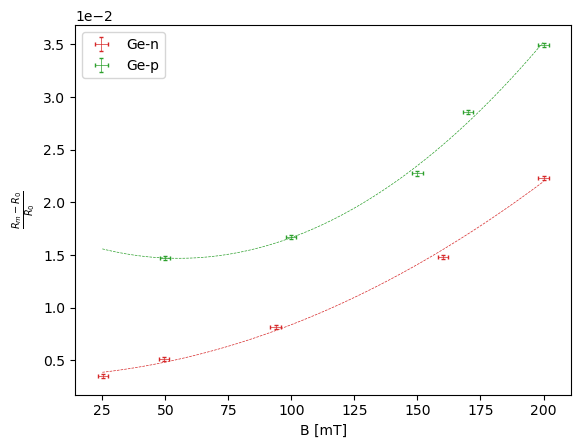

In [155]:
def modelo(x, a, b, c):
    return a*x**2+b*x+c

def modelo_1(x, a, b,c):
    return a*np.e**(x*b)+c
parametros_optimizados, covarianza_parametros = curve_fit(modelo, B,(vals-R_0)/R_0, p0 = [0.1,0.1,0.1] )

parametros_optimizados_1, covarianza_parametros_1 = curve_fit(modelo, B_,(vals_2-r_0)/r_0, p0 = [0.1,0.1,0.1] )





x_modelo = np.linspace(25, 200, 100)
y_modelo = modelo(x_modelo, *parametros_optimizados)
y_modelo_1 = modelo(x_modelo, *parametros_optimizados_1)
plt.plot(x_modelo,y_modelo,color="#d62728", linestyle ="--", linewidth=0.5)
plt.plot(x_modelo,y_modelo_1,color="#2ca02c", linestyle ="--", linewidth=0.5)
plt.errorbar(B, (vals-R_0)/R_0,color="#d62728",label = "Ge-n", fmt = " ", xerr = 2, yerr=0.0002, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
plt.errorbar(B_, (vals_2-r_0)/r_0, color ="#2ca02c",label = "Ge-p", fmt = " ", xerr = 2, yerr=0.0002, capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)


plt.xlabel("B [mT]")
plt.ylabel(r"$\frac{R_m-R_0}{R_0}$")


y_pred = modelo(B, *parametros_optimizados)
ss_res = np.sum(((vals-R_0)/R_0 - y_pred) ** 2)
ss_tot = np.sum(((vals-R_0)/R_0 - np.mean((vals-R_0)/R_0)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(r_squared)
y_pred = modelo(B_, *parametros_optimizados_1)
ss_res = np.sum(((vals_2-r_0)/r_0 - y_pred) ** 2)
ss_tot = np.sum(((vals_2-r_0)/r_0 - np.mean((vals_2-r_0)/r_0)) ** 2)
r_squared_2 = 1 - (ss_res / ss_tot)

print(r_squared_2)


print(parametros_optimizados)
print(parametros_optimizados_1)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.legend()


# Temperatura


Para n, Ip = 30 mA, B = 0


izquierda longitudinal derecha hall

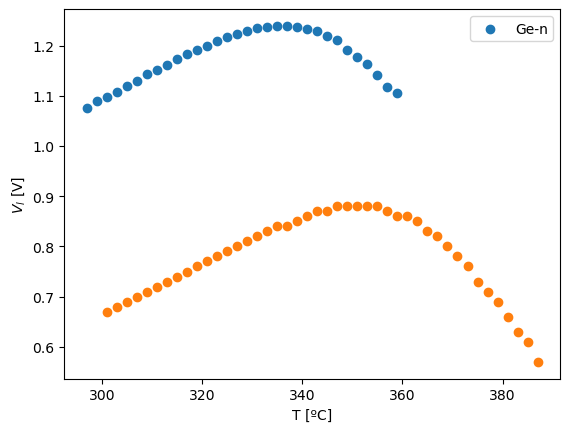

In [53]:
V_l = 1+np.array([ 76, 90, 97,108, 120,130,143, 152, 162,173, 183, 192,200, 209 , 216, 223, 229, 234, 237, 239, 239,237, 233, 228, 218, 210, 191, 178, 163 ,141, 117, 106])/1000
T_1 = np.array([ 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86])+273
plt.scatter(T_1, V_l, label = "Ge-n")
plt.legend()
plt.xlabel("T [ºC]")
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel(r"$V_l$ [V]")


V_l_p = np.array([67, 68, 69, 70,71, 72,73,74,75, 76, 77, 78,79, 80, 81, 82, 83, 84, 84,85, 86, 87, 87, 88, 88, 88, 88, 88,87, 86,86, 85, 83, 82, 80, 78, 76, 73,71,69,66,63, 61,57 ])/100
Tp = np.array([28, 30, 32, 34, 36, 38, 40,42,44,46,48, 50, 52 ,54 ,56, 58, 60, 62, 64,66, 68,70, 72, 74, 76, 78, 80, 82, 84,86, 88, 90,92, 94, 96, 98, 100, 102,104, 106, 108, 110, 112, 114 ])+273
plt.scatter(Tp,V_l_p)

ValueError: 'x' and 'y' must have the same size

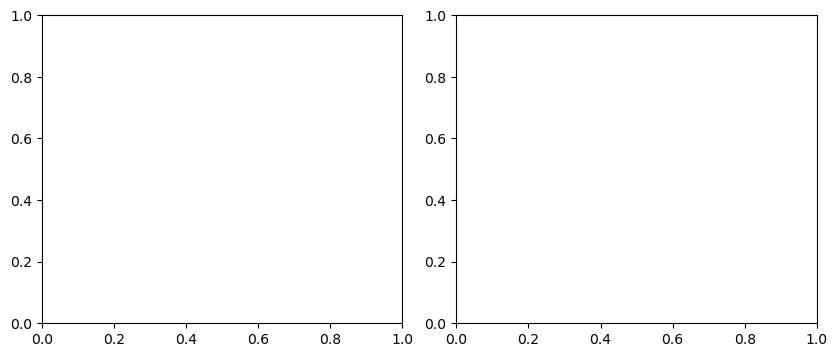

In [164]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.15)

ax1.errorbar(T_1, V_l, label = "Ge-n", xerr = 1, yerr= 1/1000, fmt = " ", capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
ax1.set_xlabel("T [K]")
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax1.set_ylabel(r"$V_l$ [V]")
ax1.set_title("Ge-n")

ax2.errorbar(Tp,V_l_p, xerr = 1, yerr= 0.01, fmt = " ", capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
ax2.set_title("Ge-p")
ax2.set_xlabel("T [K]")
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax2.yaxis.get_offset_text().set_visible(True)



Text(0.5, 1.0, 'Ge-p')

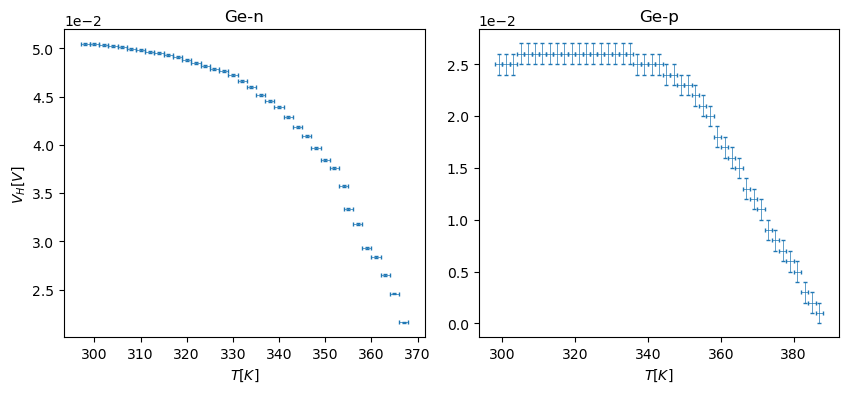

In [1512]:
#n 

T_n_2 = np.array([25, 27, 29, 31,33 ,35,37,39,41,43,45,47,49, 51,53,55,57,59,61,63,65,67,69,71, 73, 75, 77, 79, 81,82, 84, 86, 88, 90, 92, 94])+273
Vhn = np.array([50.4, 50.4, 50.3, 50.2, 50.1,49.9,49.8,49.6,49.5,49.3,49.1,48.8,48.5,48.2, 47.9, 47.6,47.2,46.6,46,45.2,44.5,43.9,42.9,41.8, 40.9,39.7, 38.4,37.6,35.7,33.4, 31.8, 29.3, 28.4, 26.5, 24.6, 21.6])*10**(-3)



T_p_2 = np.array([26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78,80,82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114 ])+273
Vhp = np.array([25, 25, 25, 26,26,26,26,26,26 ,26,26,26,26,26 ,26,26,26,26,26 ,25,25 , 25, 25, 24,24,23, 23,22 , 21, 20, 18, 17, 16, 15, 13, 12, 11,9,8, 7,6, 5, 3,2 ,1 ])*10**-3

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.15)


ax1.errorbar(T_n_2,Vhn, xerr = 1, yerr= 0.1*10**(-3), fmt = " ", capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_visible(True)


ax2.errorbar(T_p_2,Vhp, xerr = 1, yerr= 0.001, fmt = " ", capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax2.yaxis.get_offset_text().set_visible(True)


ax1.set_title("Ge-n")
ax1.set_ylabel(r"$V_H [V]$")
ax1.set_xlabel(r"$T [K]$")
ax2.set_xlabel(r"$T [K]$")
ax2.set_title("Ge-p")


[0.00198413 0.00198413 0.00198807 0.00199203 0.00199601 0.00200401
 0.00200803 0.00201613 0.0020202  0.0020284  0.00203666 0.00204918
 0.00206186 0.00207469 0.00208768 0.00210084 0.00211864 0.00214592
 0.00217391 0.00221239 0.00224719 0.0022779  0.002331   0.00239234
 0.00244499 0.00251889 0.00260417 0.00265957 0.00280112 0.00299401
 0.00314465 0.00341297 0.00352113 0.00377358 0.00406504 0.00462963]


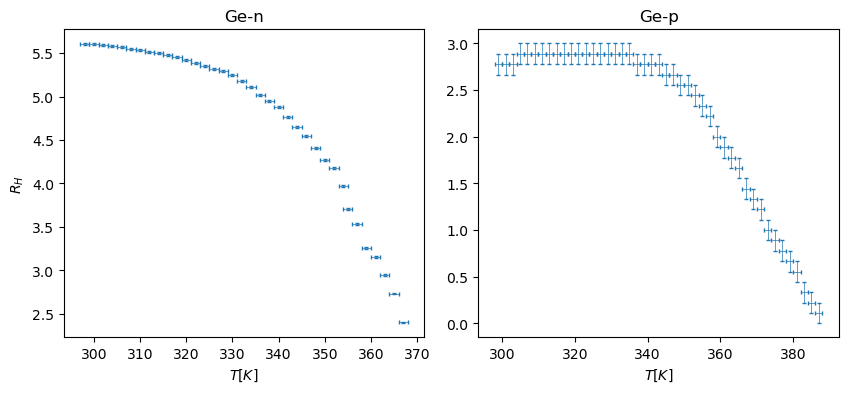

In [1513]:
Rhn = Vhn * 10**-3/(300*10**(-3)*30*10**-6)
e = 0.1*10**(-3)* 10**-3/(300*10**(-3)*30*10**-6)
Rhp = Vhp * 10**-3/(300*10**(-3)*30*10**-6)
e_2=  0.001* 10**-3/(300*10**(-3)*30*10**-6)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.15)


ax1.errorbar(T_n_2,Rhn, xerr = 1, yerr= e, fmt = " ", capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_visible(True)


ax2.errorbar(T_p_2,Rhp, xerr = 1, yerr= e_2, fmt = " ", capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax2.yaxis.get_offset_text().set_visible(True)

ax1.set_title("Ge-n")
ax1.set_ylabel(r"$R_H$")
ax1.set_xlabel(r"$T [K]$")
ax2.set_xlabel(r"$T [K]$")
ax2.set_title("Ge-p")


print(e/Rhn)

3834.2736496829357
3901.87037222799


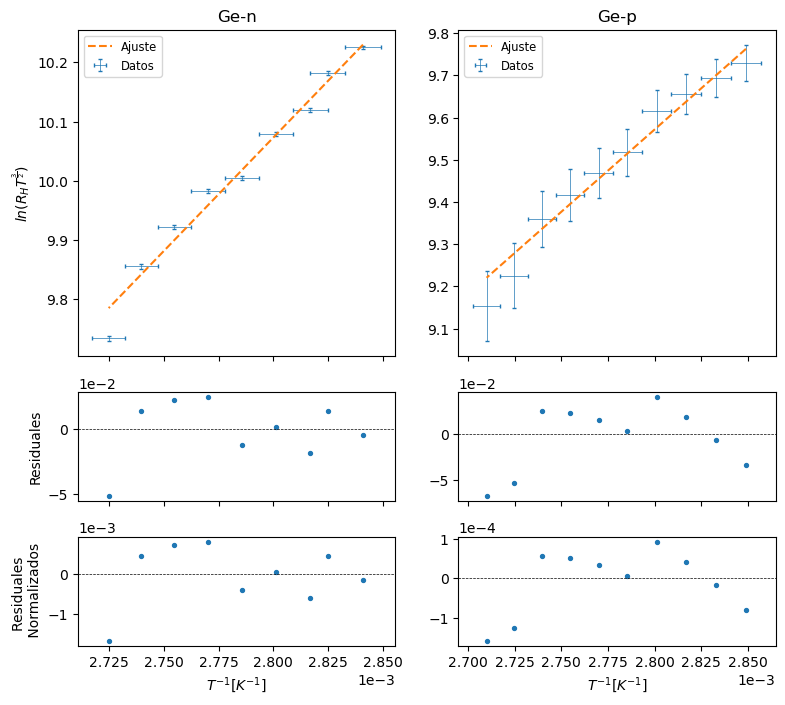

In [1523]:




T_n = 1/T_n_2[27::]
y_n = np.log((T_n_2[27::])**(3/2)*Rhn[27::])


T_p =1/T_p_2[26:-9]
y_p = np.log((T_p_2[26:-9])**(3/2)*Rhp[26:-9])




reg_n = minimos_cuadrados_incertidumbre_2(T_n,y_n,0,(e/Rhn)[27::])

reg_p = minimos_cuadrados_incertidumbre_2(T_p,y_p,0,(e_2/Rhp)[26:-9])
fig, axs = plt.subplots(3, 2, figsize=(9, 8), sharex="col", gridspec_kw={'height_ratios': [3, 1,1]})

print(reg_n[0])
print(reg_p[0])


axs[0,0].errorbar(T_n, y_n, label= "Datos", xerr = 1/(T_n_2[27::])**2,yerr=(e/Rhn)[27::], fmt =" ", capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,0].plot(T_n, T_n*reg_n[0]+reg_n[1], linestyle = "--", label = "Ajuste")
axs[1,0].scatter(T_n,y_n -(T_n*reg_n[0]+reg_n[1]), s=8)
axs[2,0].scatter(T_n, reg_n[4], s= 8)

axs[0,1].errorbar(T_p, y_p, label= "Datos",fmt = " ", xerr = T_p**2,yerr=(e_2/Rhp)[26:-9],capsize=1.5, elinewidth=0.5,markeredgewidth=1, capthick=0.5)
axs[0,1].plot(T_p, T_p*reg_p[0]+reg_p[1], linestyle = "--", label = "Ajuste")
axs[1,1].scatter(T_p, y_p-(T_p*reg_p[0]+reg_p[1]), s= 8)
axs[2,1].scatter(T_p, reg_p[4], s= 8)


axs[0,0].set_ylabel(r"$ln(R_HT^{\frac{3}{2}})$")
axs[0,0].set_title("Ge-n")
axs[0,0].legend(fontsize= "small")
axs[0,1].legend(fontsize= "small")
axs[1,0].set_ylabel("Residuales")
axs[2,0].set_ylabel("Residuales \n Normalizados")

axs[2,1].set_xlabel(r"$T^{-1} [K^{-1}]$")
axs[2,0].set_xlabel(r"$T^{-1} [K^{-1}]$")
axs[0,1].set_title("Ge-p")

axs[2,0].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
axs[2,0].xaxis.get_offset_text().set_visible(True)
axs[1,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,0].yaxis.get_offset_text().set_visible(True)
axs[2,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[2,0].yaxis.get_offset_text().set_visible(True)
axs[2,1].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
axs[2,1].xaxis.get_offset_text().set_visible(True)
axs[1,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1,1].yaxis.get_offset_text().set_visible(True)
axs[2,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[2,1].yaxis.get_offset_text().set_visible(True)


axs[1,0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[1,1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2,0].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2,1].axhline(0, color='black', linestyle='--', linewidth=0.5)

In [1524]:
m_n =reg_n[0]
m_p = reg_p[0]
e_n = reg_n[3]
e_p = reg_p[3]
print(e_n, e_p)
k_b = 8.617333262e-5
print(m_n*k_b*2*10**2)
print(m_p*k_b*2)
print(e_n*2*k_b)
print(e_p*2*k_b)

30.809989777541613 420.9309725631362
66.08242771404579
0.6724743468522516
0.0053099989942377865
0.07254604941748646
